# Double Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta_1 & \dot{\theta_1} & \theta_2 & \dot{\theta_2}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.05  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 50 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.double_cartpole.DoubleCartpoleCost()
model = pddp.examples.double_cartpole.DoubleCartpoleDynamicsModel(DT)
env = pddp.examples.double_cartpole.DoubleCartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta1 = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta1_dot = X[:, 3]
    theta2 = np.unwrap(X[:, 4])  # Makes for smoother plots.
    theta2_dot = X[:, 5]
    
    plt.figure()
    plt.plot(theta1, theta1_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Link 1 Orientation Phase Plot")

    plt.figure()
    plt.plot(theta2, theta2_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Link 2 Orientation Phase Plot")
    
    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta1)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Link 1 orientation path")

    plt.figure()
    plt.plot(t, theta1_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Link 1 angular velocity path")
    
    plt.figure()
    plt.plot(t, theta2)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Link 2 orientation path")
    
    plt.figure()
    plt.plot(t, theta2_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Link 2 angular velocity path")

    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    final_state[4] = (final_state[4] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                      on_iteration=on_iteration)

iteration 7 accepted 950.76416 [ 0.04093964  0.07096675 -3.0638883  -0.02018791 -3.127123    0.05408233]
iteration 8 accepted 944.2504 [-9.0598375e-02  9.9143088e-03 -3.0689995e+00  3.9019287e-03
  3.1406167e+00 -1.3792515e-04]
iteration 9 accepted 933.59595 [-0.17673582  0.0263335  -3.1216884   0.03321081  2.9169884  -0.03668225]
iteration 12 accepted 901.6899 [-0.19029912  0.05926587  3.05322     0.10504049  2.449204   -0.36455882]
iteration 13 FAILED 901.6899 [-0.19029912  0.05926587  3.05322     0.10504049  2.449204   -0.36455882]
iteration 14 accepted 858.00525 [-0.18156825  0.10362396  2.9079263   0.0091848   1.9526138  -0.7450775 ]
iteration 15 accepted 808.15796 [-0.15931968  0.1408751   2.744403   -0.11486155  1.5475692  -0.95333016]
iteration 17 accepted 734.3511 [-0.12286042  0.18499984  2.289046   -0.59865844  1.036792   -1.104344  ]
iteration 18 FAILED 734.3511 [-0.12286042  0.18499984  2.289046   -0.59865844  1.036792   -1.104344  ]
iteration 19 accepted 634.77954 [-0.102

iteration 87 accepted 260.9218 [-0.13975641  0.08275539  0.5158094  -0.2099818   0.03599938  0.00065878]
iteration 88 accepted 260.92056 [-0.13989703  0.08307314  0.51564527 -0.21001256  0.0365736   0.00052267]
iteration 89 accepted 260.91986 [-0.1399321   0.0828582   0.5142951  -0.20960462  0.03729895  0.00065836]
iteration 90 accepted 260.919 [-0.14004417  0.08312303  0.51419246 -0.20963633  0.03773406  0.00054082]
iteration 91 accepted 260.9185 [-0.1400646   0.08295625  0.5131637  -0.20931828  0.03827442  0.00064355]
iteration 92 accepted 260.91815 [-0.14015189  0.08317286  0.5131056  -0.2093494   0.03860717  0.0005447 ]
iteration 93 accepted 260.91788 [-0.14015724  0.08310694  0.5127096  -0.20922601  0.03880931  0.00058344]
iteration 94 accepted 260.9176 [-1.4031175e-01  8.3335400e-02  5.1186150e-01 -2.0903838e-01
  3.9708726e-02  4.8771501e-04]
iteration 95 accepted 260.91727 [-0.14029433  0.08324915  0.51166594 -0.20896482  0.0397467   0.00053453]
iteration 96 accepted 260.91724 

/Users/anass/Dev/personal/pddp/pddp/controllers/ilqr.py:235: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


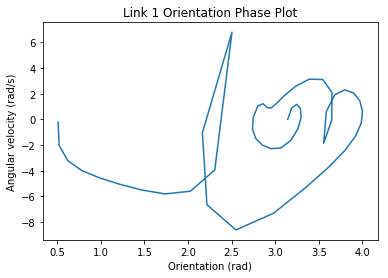

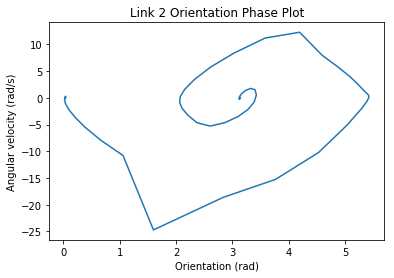

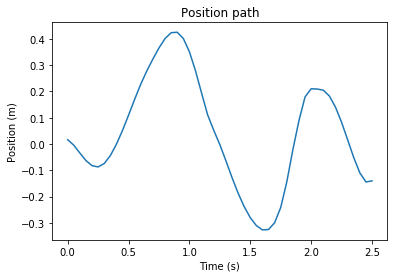

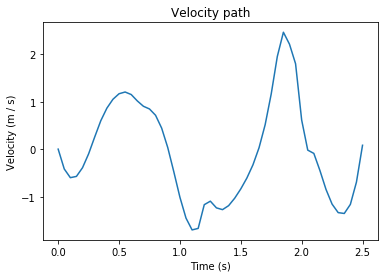

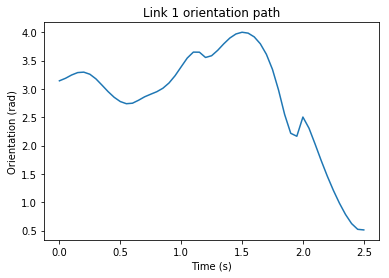

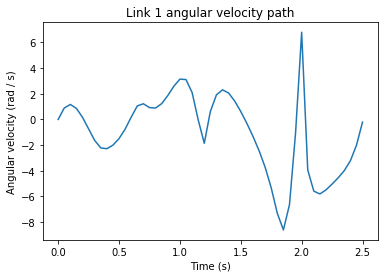

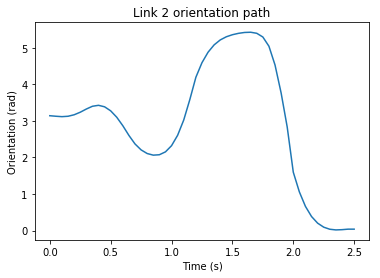

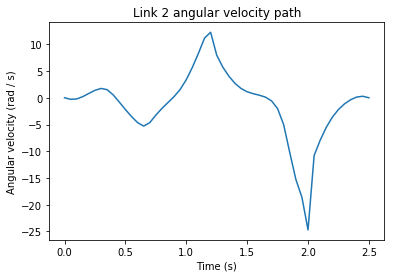

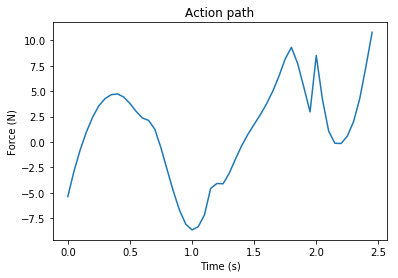

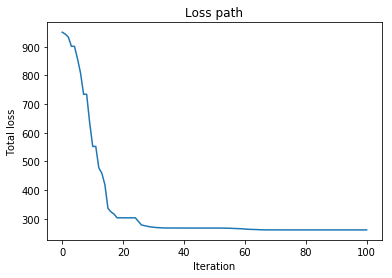

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
for u in U:
    env.apply(u)

In [16]:
env.close()